In [5]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from mlwpy import *
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
iris = datasets.load_iris()

# 10 data set sizes between 0.1 and 1
train_size = np.linspace(.1, 1.0, 10)

knn = KNeighborsClassifier(n_neighbors=5)

train_N, train_scores, test_scores = learning_curve(knn, iris.data, iris.target, cv=5, train_sizes=train_size)

# Create a dataframe to visualize this
df = pd.DataFrame(test_scores, index=(train_size * 100).astype(int))
df['Mean 5-CV'] = df.mean(axis=1)

df

,0,1,2,3,4,Mean 5-CV
10,0.3333,0.3333,0.3333,0.3333,0.3333,0.3333
20,0.3333,0.3333,0.3333,0.3333,0.3333,0.3333
30,0.3333,0.3333,0.3333,0.3333,0.3333,0.3333
40,0.6667,0.6667,0.6667,0.6667,0.6667,0.6667
50,0.6667,0.6667,0.6667,0.6667,0.6667,0.6667
60,0.6667,0.6667,0.6667,0.6667,0.6667,0.6667
70,0.9000,0.8000,0.8333,0.8667,0.8000,0.8400
80,0.9667,0.9333,0.9000,0.9000,0.9667,0.9333
90,0.9667,1.0000,0.9000,0.9667,1.0000,0.9667
100,0.9667,1.0000,0.9333,0.9667,1.0000,0.9733


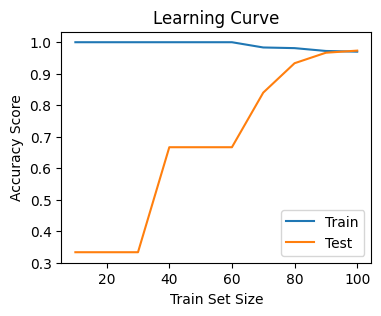

In [7]:
# Get average scores across the CV folds
avg_train_scores = train_scores.mean(axis=1)
avg_test_scores = test_scores.mean(axis=1)


# Plot
plt.plot(train_size * 100, avg_train_scores, label='Train')
plt.plot(train_size * 100, avg_test_scores, label='Test')
plt.title('Learning Curve')
plt.xlabel('Train Set Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()